In [159]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
# random forest
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error

In [215]:
df = pd.read_csv('./BostonHousing.csv')

"""
First looking at the dataset, there are many possible features to use.
We aim to use features that are most correlated with the price, prioritizing
a limited number of features due to the 'curse of dimensionality'.

This phenomenon suggests that as the number of features or dimensions increases, the 
volume of data required to achieve accurate generalization grows exponentially, and of course compute needed.

Also, we want to avoid using features that are not correlated with the price.

The dataset contains the following features:
    CRIM: Per capita crime rate by town.
    ZN: Proportion of residential land zoned for lots over 25,000 sq. ft.
    INDUS: Proportion of non-retail business acres per town.
    CHAS: Charles River dummy variable (1 if the tract bounds the river; 0 otherwise).
    NOX: Nitrogen oxide concentration (parts per 10 million).
    RM: Average number of rooms per dwelling.
    AGE: Proportion of owner-occupied units built before 1940.
    DIS: Weighted distances to five Boston employment centers.
    RAD: Index of accessibility to radial highways.
    TAX: Full-value property tax rate per $10,000.
    PTRATIO: Pupil-teacher ratio by town.
    LSTAT: Percentage of lower status of the population.
The thing we want to predict is:
    MEDV: Median value of owner-occupied homes in $1000s. This is the target variable.
"""

# Select relevant features
# We can select all features, but we will use the random forest feature importance to select the most important features
x = df[['crim', 'rm', 'ptratio', 'lstat', 'age', 'dis', 'indus', 'tax', 'nox', 'rad', 'zn', 'chas']]
y = df[['medv']]

# We will use these later for normalization, so store them 
medv_min = df['medv'].min()
medv_max = df['medv'].max()

# Normalize the features using min-max scaling
x = (x - x.min()) / (x.max() - x.min())
y = (y - medv_min) / (medv_max - medv_min)

print(x.head())
print()
print(y.head())

# Split the dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)


       crim        rm   ptratio     lstat       age       dis     indus  \
0  0.000000  0.577505  0.287234  0.089680  0.641607  0.269203  0.067815   
1  0.000236  0.547998  0.553191  0.204470  0.782698  0.348962  0.242302   
2  0.000236  0.694386  0.553191  0.063466  0.599382  0.348962  0.242302   
3  0.000293  0.658555  0.648936  0.033389  0.441813  0.448545  0.063050   
4  0.000705  0.687105  0.648936  0.099338  0.528321  0.448545  0.063050   

        tax       nox       rad    zn  chas  
0  0.208015  0.314815  0.000000  0.18   0.0  
1  0.104962  0.172840  0.043478  0.00   0.0  
2  0.104962  0.172840  0.043478  0.00   0.0  
3  0.066794  0.150206  0.086957  0.00   0.0  
4  0.066794  0.150206  0.086957  0.00   0.0  

       medv
0  0.422222
1  0.368889
2  0.660000
3  0.631111
4  0.693333


In [218]:
"""
After playing around with different models, we found that the random forest regressor
and the MLP regressor performed the best. We will use the random forest
regressor for this example.

The MLP was a close second, but it was more difficult to tune and took longer to 
train (also due to it needing more data).

The random forest regressor is an ensemble method that uses a collection of decision trees
to make predictions. It is a powerful model that is easy to use and tune.
Also, the random forest regressor allows us to easily see the feature importances, which
shows us which features are most important in predicting the price.
"""

# model = MLPRegressor(
#     hidden_layer_sizes=(128, 256, 512),
#     max_iter=200,
#     alpha=0.0003,
#     batch_size=32,
#     early_stopping=True
# )
model = RandomForestRegressor(n_estimators=300, max_depth=100)
model.fit(x_train, y_train.values.ravel())

# Predict the prices
y_pred = model.predict(x_test)

# Un-normalize the predicted prices
# y_pred_unnorm = y_pred * (medv_max - medv_min) + medv_min
# print(y_pred_unnorm)

# Calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)
print('Mean squared error: ', mse)

# Calculate the R2 score (1 is perfect prediction, 0 is random prediction)
r2_score = model.score(x_test, y_test)
print('R2 score: ', r2_score)

Mean squared error:  0.007555334301083933
R2 score:  0.852075437899247


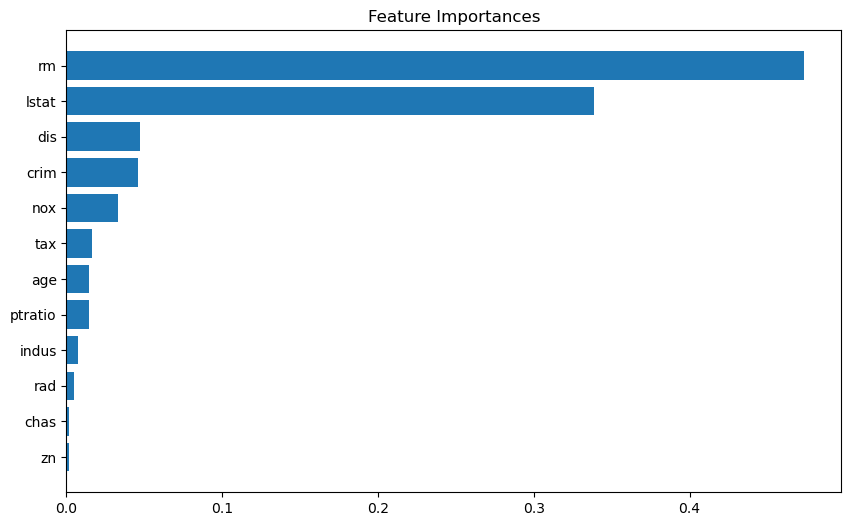

In [219]:
"""
We see in this graph that the RM (average number of rooms per dwelling) feature is the most important.
Also with a high importance is the LSTAT (percentage of lower status of the population) feature.
This makes sense, as more rooms usually means a larger house, which means a higher price.

Now, we can prune all of the features that have a low importance, and retrain the model.
"""

importances = model.feature_importances_
feature_names = x.columns
importance_dict = dict(zip(feature_names, importances))
sorted_importance = sorted(importance_dict.items(), key=lambda x: x[1], reverse=True)

plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.barh([item[0] for item in sorted_importance], [item[1] for item in sorted_importance])
plt.gca().invert_yaxis()
plt.show()
